Using TensorFlow backend.


11501568/11490434 [==============================] - 1s 0us/step
('x_train shape:', (60000, 28, 28, 1))
(60000, 'train samples')
(10000, 'test samples')


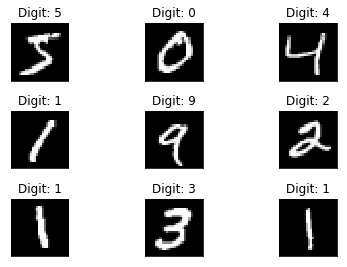

In [1]:
#importing required libraries 

#importing Pandas
import pandas as pd
#importing Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
#importing Numpy
import numpy as np
#importing rcParams to set size of the plot
from pylab import rcParams
#impoting Random to randomly plot images of few digits
import random
#impoting warnings module to ignore the warnings if any during execution
import warnings
warnings.filterwarnings('ignore')
#imporing keras
import keras
#importing the MNIST dataset
from keras.datasets import mnist
#Sequential allows to build a model layer by layer
from keras.models import Sequential 
#Dropout is a way of cutting too much association among features by dropping the weights (edges) at a probability. 
# Flatten layers are used when you got a multidimensional output and you want to make it linear to pass it onto a Dense layer.
from keras.layers import Dense, Dropout, Flatten 
# Mandatory Conv2D parameter is the numbers of filters that convolutional layers will learn from.
from keras.layers import Conv2D, MaxPooling2D
#Keras does not handle itself low-level operations such as tensor products, convolutions and so on. 
# Instead, it relies on a specialized, well-optimized tensor manipulation library to do so, serving as the "backend engine" of Keras.
#Google Colab uses Tensorflow as default backend hence for this project Tensorflow backend is used
from keras import backend as K

# The batch size is a number of samples processed before the model is updated
batch_size = 128
#The number of different categories present in the data
num_classes = 10
# The number of epochs is the number of complete passes through the training dataset.
epochs = 12
#appending each pass in a list
epoch_list=[]
for i in range (1,epochs+1):
  epoch_list.append(i)

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#plots images of few digits randomly
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i],cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


**Defining the classifier**


> The first argument is **Number of feature maps in the first convolution layer**

> The second argument is the **Number of feature maps in the second convolution layer**

> The third argument is the **Size of the kernel in the first convolution layer**

> The fourth argument is the **Size of the kernel in the second convolution layer**







In [0]:
def CNN(feature_maps_layer_1, feature_maps_layer_2,kernel_size_layer_1,kernel_size_layer_2):
  model = Sequential()
  #adding the first convolution layer with activation function RELU
  model.add(Conv2D(feature_maps_layer_1, kernel_size=kernel_size_layer_1,
                  activation='relu',
                  input_shape=input_shape))
  # 2D Max pooling block represents a max pooling operation
  model.add(MaxPooling2D(pool_size=(2, 2)))
  #adding the second convolution layer with activation function RELU
  model.add(Conv2D(feature_maps_layer_2,kernel_size_layer_2, activation='relu'))
  # 2D Max pooling block represents a max pooling operation
  model.add(MaxPooling2D(pool_size=(2, 2)))
  #Used to convert a multidimensional Tensor into a sigle 1-D tensor
  model.add(Flatten())
  # In dense layer each input is connected to every output by a weight
  #This dense layer will produce a output array of shape (*,120) and uses RELU as activation function
  model.add(Dense(120, activation='relu'))
  #This dense layer will produce a output array of shape (*,84) and uses RELU as activation function
  model.add(Dense(84, activation='relu'))
  #This dense layer will produce a output array of shape (*,10) and uses Softmax as activation function
  model.add(Dense(num_classes, activation='softmax'))

  # https://keras.io/optimizers/ 
  model.compile(loss=keras.losses.categorical_crossentropy,
                optimizer=keras.optimizers.Adadelta(lr=0.1, rho=0.95, epsilon=None, decay=0.0),
                metrics=['accuracy'])
  #Training the user model on the training dataeset 
  user_model = model.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=epochs,
            verbose=1,
            validation_data=(x_test, y_test))
  score = model.evaluate(x_test, y_test, verbose=0)
  print 'Test loss:', score[0] 
  print 'Test accuracy:', score[1]
  metrics = pd.DataFrame({"train_acc":user_model.history['acc'], "train_loss":user_model.history['loss'], "test_acc":user_model.history['val_acc'],"test_loss":user_model.history['val_loss']})
  rcParams['figure.figsize'] = 20, 15
  ax=plt.subplot(111)
  ax.plot(epoch_list,metrics['train_loss'], label='Train Dataset',linestyle='-', marker='o')
  ax.plot(epoch_list,metrics['test_loss'], label='Test Dataset',linestyle='-', marker='o')
  plt.title('Training Error / Testing Error vs Epochs',fontsize=25)
  plt.xlabel('Epochs', fontsize=16)
  plt.ylabel('Error', fontsize=16)
  rng = np.arange(1,13,1)
  ax.set_xticks(rng)
  ax.legend()
  plt.grid()
  plt.show()

**Baseline Model**

> This uses a 3x3 kernel for both the first and second convolution layer. The number of feature maps in the baseline code is 6 for the first and 16 for the second convolution layer.

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 20s 336us/step - loss: 0.7857 - acc: 0.7783 - val_loss: 0.2673 - val_acc: 0.9209
Epoch 2/12
60000/60000 [==============================] - 19s 317us/step - loss: 0.2336 - acc: 0.9295 - val_loss: 0.1804 - val_acc: 0.9444
Epoch 3/12
60000/60000 [==============================] - 19s 317us/step - loss: 0.1754 - acc: 0.9477 - val_loss: 0.1381 - val_acc: 0.9577
Epoch 4/12
60000/60000 [==============================] - 19s 317us/step - loss: 0.1448 - acc: 0.9567 - val_loss: 0.1249 - val_acc: 0.9611
Epoch 5/12
60000/60000 [==============================] - 19s 317us/step - loss: 0.1250 - acc: 0.9621 - val_loss: 0.1109 - val_acc: 0.9650
Epoch 6/12
60000/60000 [==============================] - 19s 315us/step - loss: 0.1119 - acc: 0.9657 - val_loss: 0.0966 - val_acc: 0.9691
Epoch 7/12
60000/60000 [==============================] - 19s 316us/step - loss: 0.1017 - acc: 0.9693 - val_loss: 0.

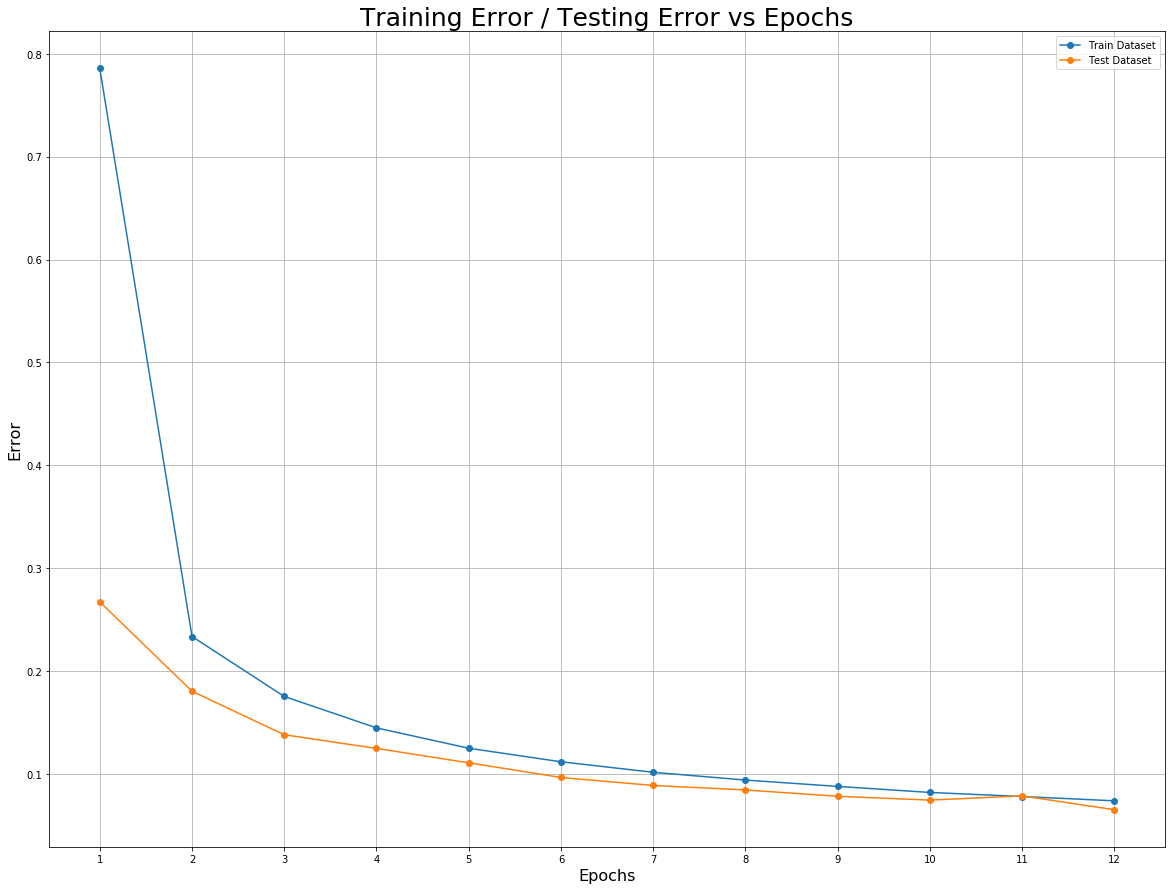

In [0]:
CNN(6,16,(3,3),(3,3))

**Modified Model - 1:**

> The kernel size in both the convolution layers is changed to 5x5



Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 22s 368us/step - loss: 0.7603 - acc: 0.7783 - val_loss: 0.2779 - val_acc: 0.9160
Epoch 2/12
60000/60000 [==============================] - 21s 354us/step - loss: 0.2474 - acc: 0.9258 - val_loss: 0.2072 - val_acc: 0.9368
Epoch 3/12
60000/60000 [==============================] - 21s 349us/step - loss: 0.1946 - acc: 0.9415 - val_loss: 0.1876 - val_acc: 0.9412
Epoch 4/12
60000/60000 [==============================] - 21s 351us/step - loss: 0.1629 - acc: 0.9507 - val_loss: 0.1417 - val_acc: 0.9578
Epoch 5/12
60000/60000 [==============================] - 21s 358us/step - loss: 0.1397 - acc: 0.9580 - val_loss: 0.1313 - val_acc: 0.9599
Epoch 6/12
60000/60000 [==============================] - 21s 357us/step - loss: 0.1232 - acc: 0.9626 - val_loss: 0.1093 - val_acc: 0.9682
Epoch 7/12
60000/60000 [==============================] - 22s 360us/step - loss: 0.1099 - acc: 0.9664 - val_loss: 0.

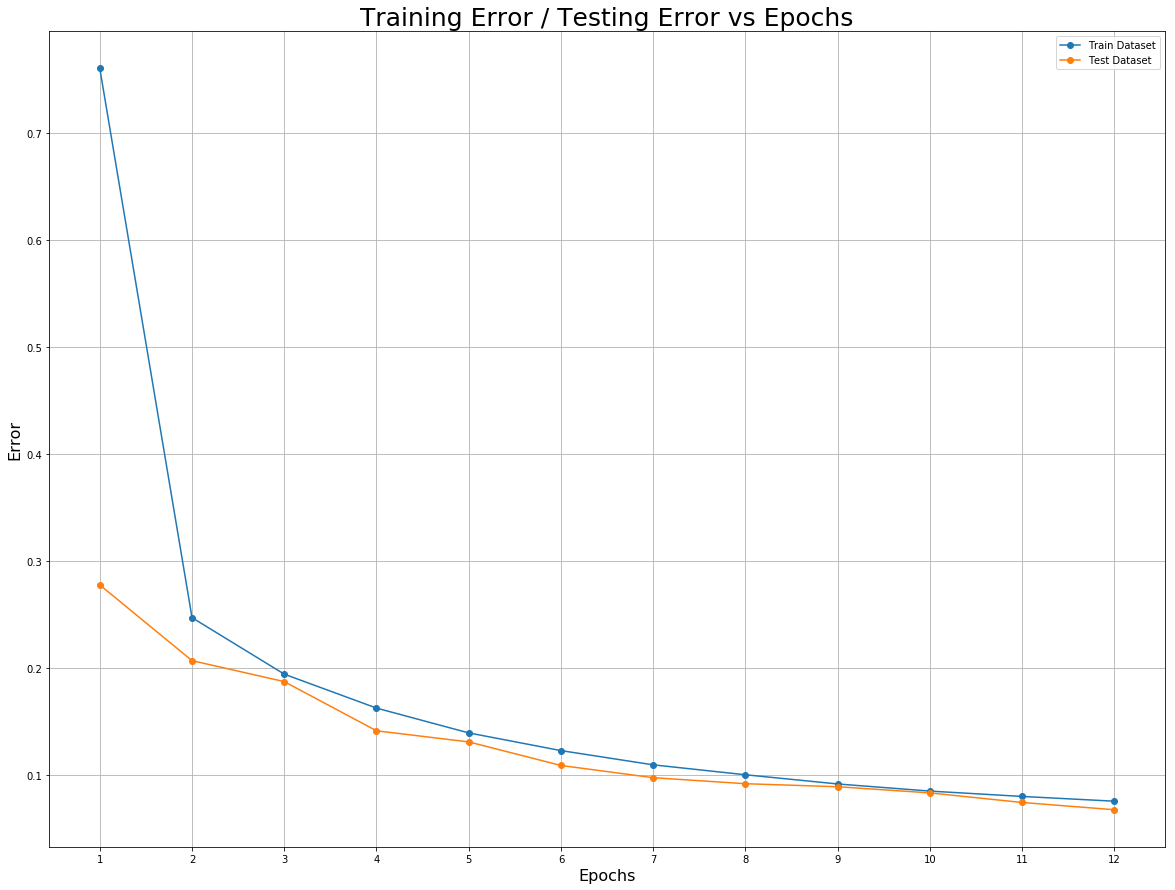

In [0]:
CNN(6,16,(5,5),(5,5))

**Modified Model - 2:**


> The number of feature maps are changed in both the convolution layers. The number of feature maps in the first convolution layer is 32 and the kernel size is 3x3. The number of feature maps in the second convolution layer is 64 and the kernel size is 3x3.



W1210 00:13:35.656919 140045779482496 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1210 00:13:35.667773 140045779482496 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1210 00:13:35.674947 140045779482496 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1210 00:13:35.704706 140045779482496 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W1210 00:13:35.767415 140045779482496 module_wrapper.py:139] From /usr/loca

Train on 60000 samples, validate on 10000 samples
Epoch 1/12


W1210 00:13:36.386158 140045779482496 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:190: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.

W1210 00:13:36.387998 140045779482496 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:199: The name tf.is_variable_initialized is deprecated. Please use tf.compat.v1.is_variable_initialized instead.

W1210 00:13:36.518527 140045779482496 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:206: The name tf.variables_initializer is deprecated. Please use tf.compat.v1.variables_initializer instead.



60000/60000 [==============================] - 46s 763us/step - loss: 0.6562 - acc: 0.7944 - val_loss: 0.1999 - val_acc: 0.9428
Epoch 2/12
60000/60000 [==============================] - 45s 744us/step - loss: 0.1738 - acc: 0.9482 - val_loss: 0.1314 - val_acc: 0.9617
Epoch 3/12
60000/60000 [==============================] - 45s 747us/step - loss: 0.1211 - acc: 0.9642 - val_loss: 0.1090 - val_acc: 0.9685
Epoch 4/12
60000/60000 [==============================] - 45s 745us/step - loss: 0.0952 - acc: 0.9710 - val_loss: 0.0749 - val_acc: 0.9773
Epoch 5/12
60000/60000 [==============================] - 45s 752us/step - loss: 0.0798 - acc: 0.9759 - val_loss: 0.0670 - val_acc: 0.9799
Epoch 6/12
60000/60000 [==============================] - 45s 743us/step - loss: 0.0702 - acc: 0.9786 - val_loss: 0.0634 - val_acc: 0.9798
Epoch 7/12
60000/60000 [==============================] - 45s 748us/step - loss: 0.0628 - acc: 0.9810 - val_loss: 0.0546 - val_acc: 0.9820
Epoch 8/12
60000/60000 [==============

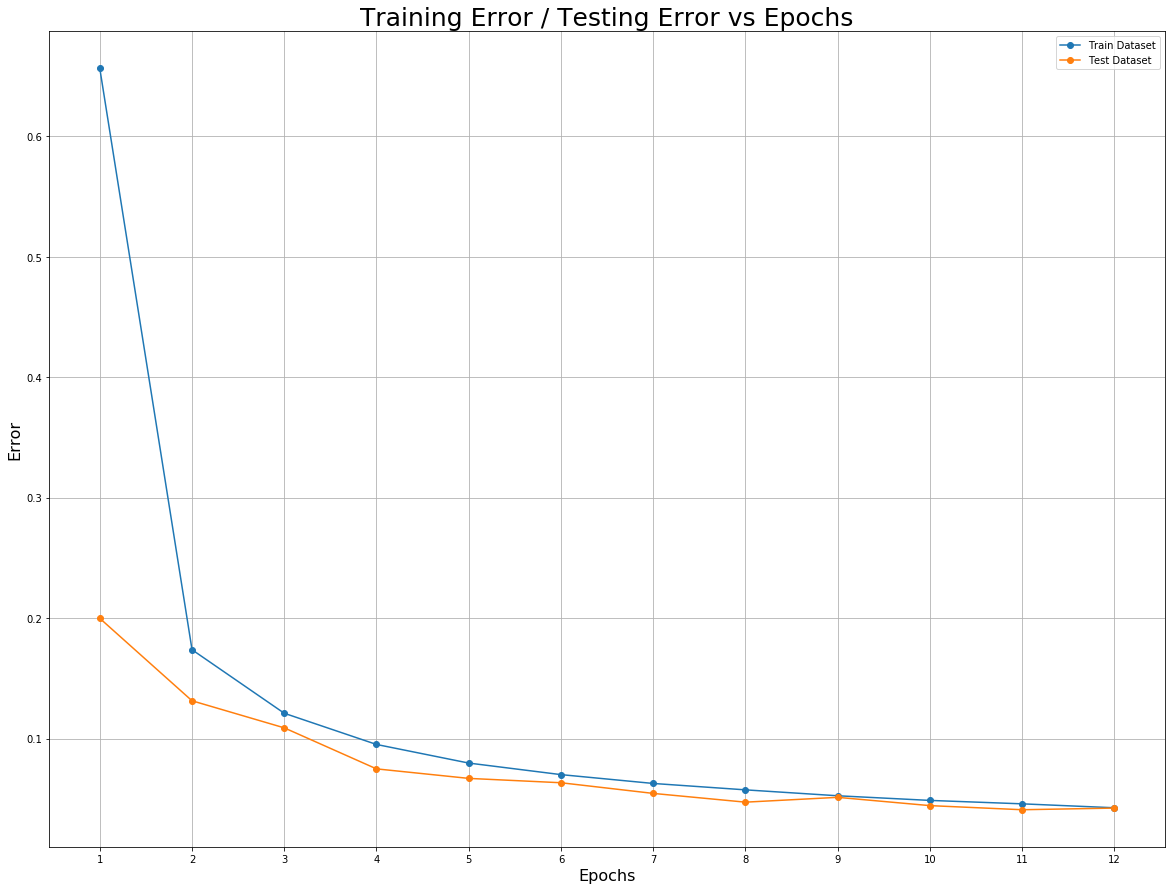

In [3]:
CNN(32,64,(3,3),(3,3))

**Modified Model - 3**

> The number of feature maps in the first convolution layer is 32 and the kernel size is 5x5. The number of feature maps in the second convolution layer is 64 and the kernel size is 5x5.



Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 56s 925us/step - loss: 0.5545 - acc: 0.8465 - val_loss: 0.1850 - val_acc: 0.9398
Epoch 2/12
60000/60000 [==============================] - 55s 924us/step - loss: 0.1487 - acc: 0.9559 - val_loss: 0.1097 - val_acc: 0.9656
Epoch 3/12
60000/60000 [==============================] - 55s 921us/step - loss: 0.1026 - acc: 0.9689 - val_loss: 0.0797 - val_acc: 0.9748
Epoch 4/12
60000/60000 [==============================] - 55s 923us/step - loss: 0.0816 - acc: 0.9758 - val_loss: 0.0644 - val_acc: 0.9809
Epoch 5/12
60000/60000 [==============================] - 55s 918us/step - loss: 0.0688 - acc: 0.9789 - val_loss: 0.0543 - val_acc: 0.9834
Epoch 6/12
60000/60000 [==============================] - 55s 923us/step - loss: 0.0606 - acc: 0.9818 - val_loss: 0.0479 - val_acc: 0.9853
Epoch 7/12
60000/60000 [==============================] - 55s 923us/step - loss: 0.0541 - acc: 0.9839 - val_loss: 0.

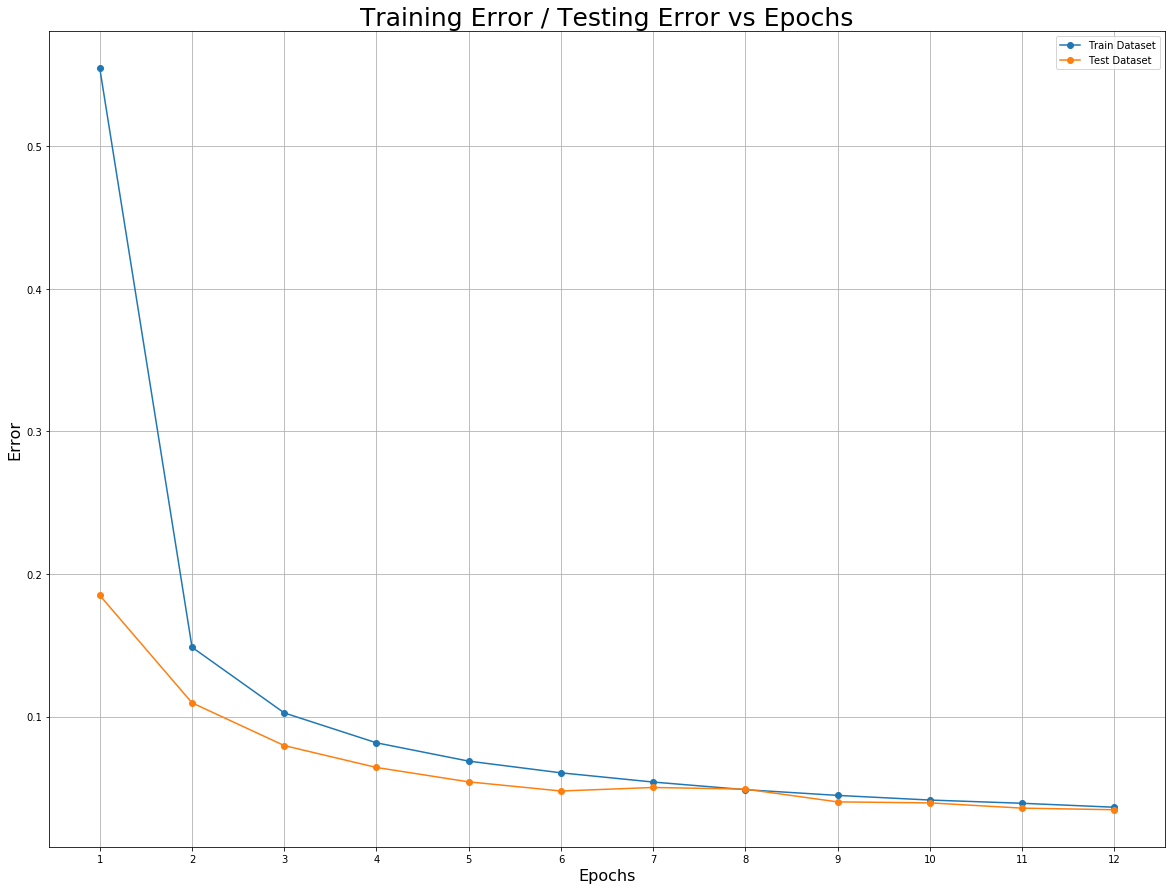

In [4]:
CNN(32,64,(5,5),(5,5))